#**SENTIMENT ANALYSIS IN FAKE NEWS DETECTION**

---



In [1]:
import pandas as pd
import numpy as np

#**SENTIMENT ANALYSIS**

---



In [67]:
#DATA IMPORTING

In [2]:
data_train = pd.read_csv('/content/train.csv', encoding='latin1')
data_test = pd.read_csv('/content/test.csv', encoding='latin1')

In [3]:
data_train

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346,652860.0,60
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797,27400.0,105
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044,2381740.0,18
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265,470.0,164
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272,1246700.0,26
...,...,...,...,...,...,...,...,...,...,...
27476,4eac33d1c0,wish we could come see u on Denver husband l...,d lost,negative,night,31-45,Ghana,31072940,227540.0,137
27477,4f4c4fc327,I`ve wondered about rake to. The client has ...,", don`t force",negative,morning,46-60,Greece,10423054,128900.0,81
27478,f67aae2310,Yay good for both of you. Enjoy the break - y...,Yay good for both of you.,positive,noon,60-70,Grenada,112523,340.0,331
27479,ed167662a5,But it was worth it ****.,But it was worth it ****.,positive,night,70-100,Guatemala,17915568,107160.0,167


In [4]:
data_train.shape

(27481, 10)

In [5]:
data_test

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...
4810,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
data_test.shape

(4815, 9)

In [7]:
data = pd.concat([data_train, data_test], ignore_index=True)

In [8]:
data

,textID,text,selected_text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²)
0,cb774db0d1,"I`d have responded, if I were going","I`d have responded, if I were going",neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0
1,549e992a42,Sooo SAD I will miss you here in San Diego!!!,Sooo SAD,negative,noon,21-30,Albania,2877797.0,27400.0,105.0
2,088c60f138,my boss is bullying me...,bullying me,negative,night,31-45,Algeria,43851044.0,2381740.0,18.0
3,9642c003ef,what interview! leave me alone,leave me alone,negative,morning,46-60,Andorra,77265.0,470.0,164.0
4,358bd9e861,"Sons of ****, why couldn`t they put them on t...","Sons of ****,",negative,noon,60-70,Angola,32866272.0,1246700.0,26.0
...,...,...,...,...,...,...,...,...,...,...
32291,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32292,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32293,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32294,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
data.shape

(32296, 10)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32296 entries, 0 to 32295
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   selected_text     27480 non-null  object 
 3   sentiment         31015 non-null  object 
 4   Time of Tweet     31015 non-null  object 
 5   Age of User       31015 non-null  object 
 6   Country           31015 non-null  object 
 7   Population -2020  31015 non-null  float64
 8   Land Area (Km²)   31015 non-null  float64
 9   Density (P/Km²)   31015 non-null  float64
dtypes: float64(3), object(7)
memory usage: 2.5+ MB


In [11]:
data['text']

0                      I`d have responded, if I were going
1            Sooo SAD I will miss you here in San Diego!!!
2                                my boss is bullying me...
3                           what interview! leave me alone
4         Sons of ****, why couldn`t they put them on t...
                               ...                        
32291                                                  NaN
32292                                                  NaN
32293                                                  NaN
32294                                                  NaN
32295                                                  NaN
Name: text, Length: 32296, dtype: object

#_**DATA PREPROCESSING**_

In [12]:
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
def remove_characters(text):
    text = re.sub(r'<.*?>', '', str(text))
    text = re.sub(r'[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub(r'\s+', ' ', str(text)).strip()
    return text
data['clean_text'] = data['text'].apply(remove_characters)

In [14]:
data['clean_text']

0                        Id have responded if I were going
1               Sooo SAD I will miss you here in San Diego
2                                   my boss is bullying me
3                            what interview leave me alone
4        Sons of why couldnt they put them on the relea...
                               ...                        
32291                                                  nan
32292                                                  nan
32293                                                  nan
32294                                                  nan
32295                                                  nan
Name: clean_text, Length: 32296, dtype: object

In [15]:
def txt_tokenize(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
data['tokens'] = data['text'].apply(txt_tokenize)

In [16]:
data['tokens']

0        [I, `, d, have, responded, ,, if, I, were, going]
1        [Sooo, SAD, I, will, miss, you, here, in, San,...
2                        [my, boss, is, bullying, me, ...]
3                   [what, interview, !, leave, me, alone]
4        [Sons, of, *, *, *, *, ,, why, couldn, `, t, t...
                               ...                        
32291                                                [nan]
32292                                                [nan]
32293                                                [nan]
32294                                                [nan]
32295                                                [nan]
Name: tokens, Length: 32296, dtype: object

In [17]:
def txt_normalize(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
data['normalized'] = data['text'].apply(txt_normalize)

In [18]:
data['normalized']

0                        id have responded if i were going
1               sooo sad i will miss you here in san diego
2                                   my boss is bullying me
3                            what interview leave me alone
4        sons of why couldnt they put them on the relea...
                               ...                        
32291                                                  nan
32292                                                  nan
32293                                                  nan
32294                                                  nan
32295                                                  nan
Name: normalized, Length: 32296, dtype: object

In [19]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
data['without_stopwords'] = data['text'].apply(remove_stopwords)

In [20]:
data['without_stopwords']

0                                   I`d responded, going
1                             Sooo SAD miss San Diego!!!
2                                    boss bullying me...
3                                 interview! leave alone
4        Sons ****, couldn`t put releases already bought
                              ...                       
32291                                                   
32292                                                   
32293                                                   
32294                                                   
32295                                                   
Name: without_stopwords, Length: 32296, dtype: object

In [21]:
data.dropna(inplace=True)

In [22]:
data['sentiment'].value_counts()

sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

#_**SENTIMENT DISTRIBUTION**_

In [23]:
import matplotlib.pyplot as plt

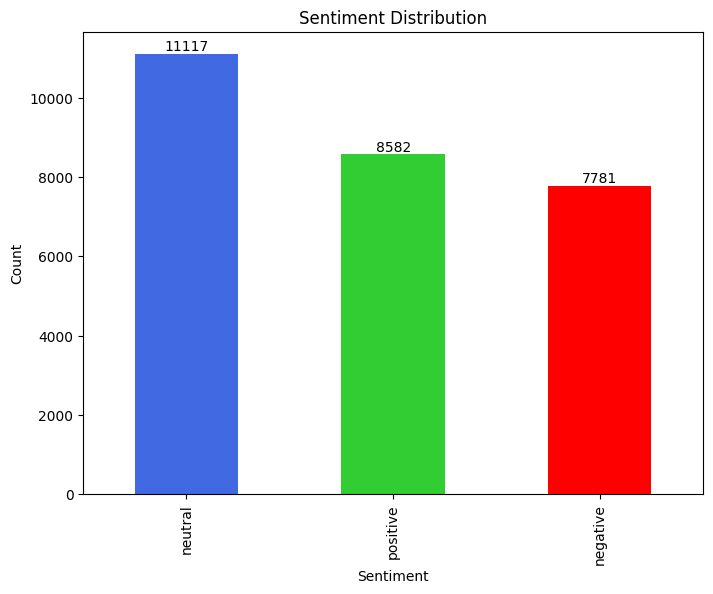

In [24]:
# Define colors for each sentiment
colors = {'positive': 'limegreen', 'negative': 'red', 'neutral': 'royalblue'}

# Calculate sentiment counts
sentiment_counts = data['sentiment'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
bars = sentiment_counts.plot(kind='bar', color=[colors.get(sentiment, 'black') for sentiment in sentiment_counts.index])

# Add labels to the bars
for bar in bars.patches:
    plt.text(bar.get_x() + bar.get_width() / 2,
             bar.get_height(),
             f"{bar.get_height()}",
             ha='center',
             va='bottom')

plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

#_**WORD CLOUD FOR EACH SENTIMENT**_

In [25]:
import seaborn as sns
from string import punctuation
from nltk.stem import LancasterStemmer
from wordcloud import WordCloud
import string

#_**CREATE A COMBINING FUNCTION FOR STEMMING**_

In [30]:
Combining = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = data['text'].tolist()
print(len(corpus))
print(corpus[13])

27480
i want to go to music tonight but i lost my voice.


#_**POSITIVE SENTIMENT**_

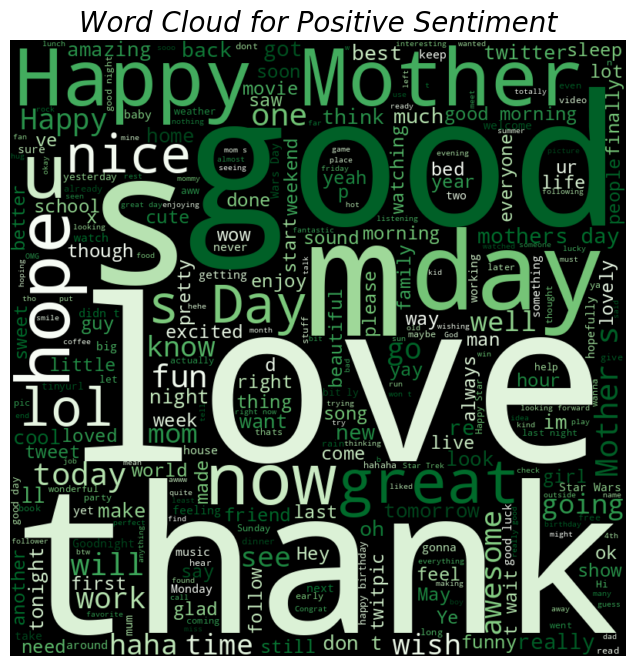

In [31]:
#Extract postive sentiment
positive_text = ' '.join(data[data['sentiment'] == 'positive']['text'])

#Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,  max_words=300,
            background_color ='black',colormap= 'Greens',min_font_size = 10).generate(positive_text)

# Define title parameters
title_text = 'Word Cloud for Positive Sentiment'
title_font_size = 20
title_fontstyle='italic'
background_color = 'lightgrey'


# Display the word cloud
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(title_text, fontsize=title_font_size,fontstyle=title_fontstyle,color='Black')
plt.gca().set_facecolor(background_color)
plt.show()

#_**NEGATIVE SENTIMENT**_

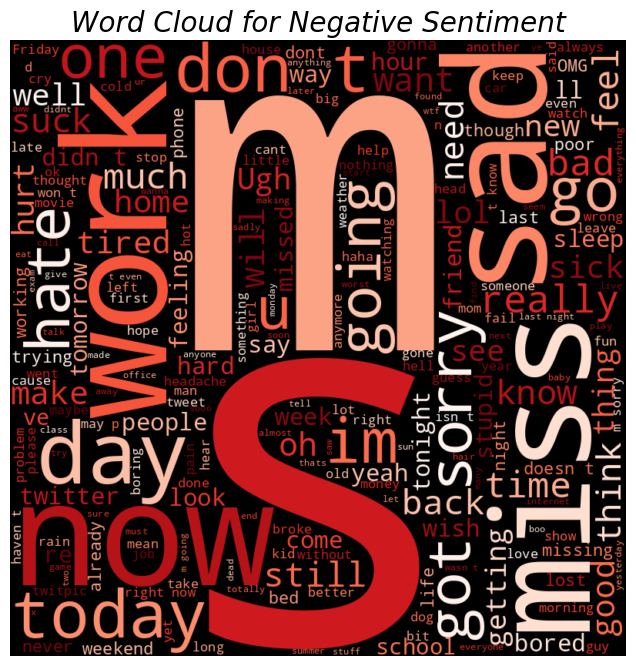

In [32]:
#Extract negative sentiment
negative_text = ' '.join(data[data['sentiment'] == 'negative']['text'])

#Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,  max_words=300,
            background_color ='black',colormap='Reds', min_font_size = 10).generate(negative_text)

# Define title parameters
title_text = 'Word Cloud for Negative Sentiment'
title_font_size = 20
title_fontstyle='italic'
background_color = 'lightgrey'


# Display the word cloud
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(title_text, fontsize=title_font_size,fontstyle=title_fontstyle,color='Black')
plt.gca().set_facecolor(background_color)
plt.show()

#_**NEUTRAL SENTIMENT**_

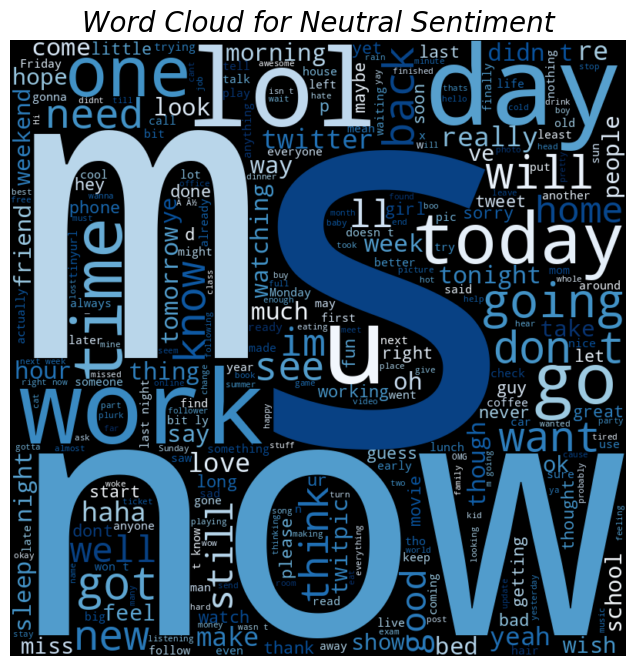

In [33]:
#Extract neutral sentiment
neutral_text = ' '.join(data[data['sentiment'] == 'neutral']['text'])

#Generate word cloud
wordcloud = WordCloud(width = 800, height = 800,  max_words=300,
            background_color ='black',colormap='Blues', min_font_size = 10).generate(neutral_text)

# Define title parameters
title_text = 'Word Cloud for Neutral Sentiment'
title_font_size = 20
title_fontstyle='italic'
background_color = 'lightgrey'

# Display the word cloud
plt.figure(figsize=(15, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title(title_text, fontsize=title_font_size,fontstyle=title_fontstyle,color='Black')
plt.gca().set_facecolor(background_color)
plt.show()

In [34]:
df = pd.DataFrame()
data_txt = data['text'].astype(str).tolist()
df['text'] = data_txt
df['sentiment'] = data["sentiment"].values

In [35]:
df.head(3)

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative


In [ ]:
#df.to_csv('data_sentiment_final.csv', index=False)

In [36]:
def stpwrd(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [37]:
data['selected_text'] = data['selected_text'].apply(stpwrd)

In [38]:
data['selected_text']

0                        Id have responded if I were going
1                                                 Sooo SAD
2                                              bullying me
3                                           leave me alone
4                                                 Sons of 
                               ...                        
27476                                               d lost
27477                                           dont force
27478                             Yay good for both of you
27479                                But it was worth it  
27480    All this flirting going on  The ATG smiles Yay...
Name: selected_text, Length: 27480, dtype: object

#_**DEFINING DATA AND TARGET FOR THE MODEL**_

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
X = data['selected_text']
Y = data['sentiment']

#_**SPLITING DATA**_

In [41]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

#_**TFIDF Vectorizer**_

In [42]:
# Initialize TF-IDF vectorizer
vectorization = TfidfVectorizer()
# Fit and transform the training data
X_train_tfidf = vectorization.fit_transform(X_train)
# Transform the testing data
X_test_tfidf = vectorization.transform(X_test)

In [43]:
sentiment_counts = data['sentiment'].value_counts(normalize=True)
sentiment_counts

sentiment
neutral     0.404549
positive    0.312300
negative    0.283151
Name: proportion, dtype: float64

####The majority class is neutral, as it has the highest proportion, the baseline accuracy could be 40%, indicating that if we always predict "neutral", we would achieve an accuracy of 40%.

In [44]:
majority_class = sentiment_counts.idxmax()
baseline_accuracy = sentiment_counts[majority_class]
print("Baseline Accuracy:", baseline_accuracy)

Baseline Accuracy: 0.40454876273653567


#_**Logistic Regression Model**_

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [46]:
# Initialize Logistic Regression model with custom parameters
lr_model = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='liblinear',
                              class_weight='balanced', random_state=42)

# Train the Logistic Regression model
lr_model.fit(X_train_tfidf, Y_train)

# Predict sentiment labels for testing data
y_pred_lr = lr_model.predict(X_test_tfidf)

###_*Model Metrics*_

In [48]:
# Evaluate the model
accuracy_lr = accuracy_score(Y_test, y_pred_lr)
print("Accuracy for Logistic Regression :", accuracy_lr)

# Display classification report
print("Classification Report for Logistic Regression :")
print(classification_report(Y_test, y_pred_lr))

Accuracy for Logistic Regression : 0.8294032023289665
Classification Report for Logistic Regression :
              precision    recall  f1-score   support

    negative       0.81      0.79      0.80      1971
     neutral       0.80      0.87      0.83      2758
    positive       0.90      0.82      0.86      2141

    accuracy                           0.83      6870
   macro avg       0.84      0.82      0.83      6870
weighted avg       0.83      0.83      0.83      6870



###_*Model Confusion Matrix*_

In [49]:
from sklearn.metrics import confusion_matrix

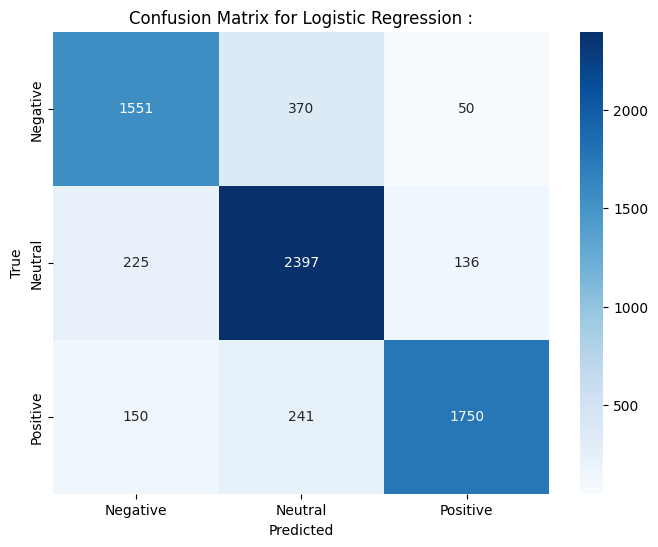

In [50]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Neutral', 'Positive'],
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix for Logistic Regression :")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#_**Decision Tree Model**_

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
# Initialize Decision Tree classifier with custom parameters
dt_model = DecisionTreeClassifier(max_depth=3000, random_state=42)

# Train the Decision Tree classifier
dt_model.fit(X_train_tfidf, Y_train)

# Predict sentiment labels for testing data
y_pred_dt = dt_model.predict(X_test_tfidf)

###_*Model Metrics*_

In [53]:
# Evaluate the model
accuracy_dt = accuracy_score(Y_test, y_pred_dt)
print("Accuracy for Decision Tree :", accuracy_dt)

# Display classification report
print("Classification Report for Decision Tree :")
print(classification_report(Y_test, y_pred_dt))

Accuracy for Decision Tree : 0.7615720524017467
Classification Report for Decision Tree :
              precision    recall  f1-score   support

    negative       0.71      0.74      0.72      1971
     neutral       0.76      0.77      0.76      2758
    positive       0.83      0.78      0.80      2141

    accuracy                           0.76      6870
   macro avg       0.76      0.76      0.76      6870
weighted avg       0.76      0.76      0.76      6870



###_*Model Confusion Matrix*_

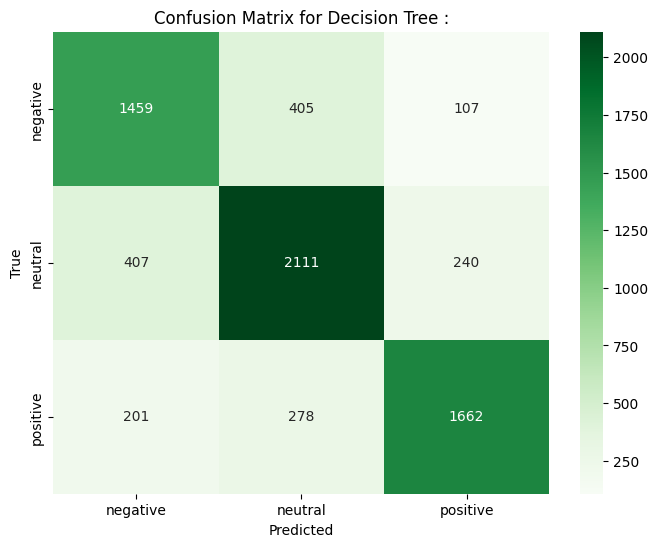

In [54]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_dt)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Greens",
            xticklabels=dt_model.classes_,
            yticklabels=dt_model.classes_)
plt.title("Confusion Matrix for Decision Tree :")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#_**Random Forest Model**_

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
# Initialize Random Forest classifier with custom parameters
rf_model = RandomForestClassifier(random_state=42)

# Train the Random Forest classifier
rf_model.fit(X_train_tfidf, Y_train)

# Predict sentiment labels for testing data
y_pred_rf = rf_model.predict(X_test_tfidf)

###_*Model Metrics*_

In [57]:
# Evaluate the model
accuracy_rf = accuracy_score(Y_test, y_pred_rf)
print("Accuracy for Random Forest :", accuracy_rf)

# Display classification report
print("Classification Report for Random Forest :")
print(classification_report(Y_test, y_pred_rf))

Accuracy for Random Forest : 0.8096069868995633
Classification Report for Random Forest :
              precision    recall  f1-score   support

    negative       0.78      0.75      0.76      1971
     neutral       0.76      0.89      0.82      2758
    positive       0.92      0.76      0.83      2141

    accuracy                           0.81      6870
   macro avg       0.82      0.80      0.81      6870
weighted avg       0.82      0.81      0.81      6870



###_*Model Confusion Matrix*_

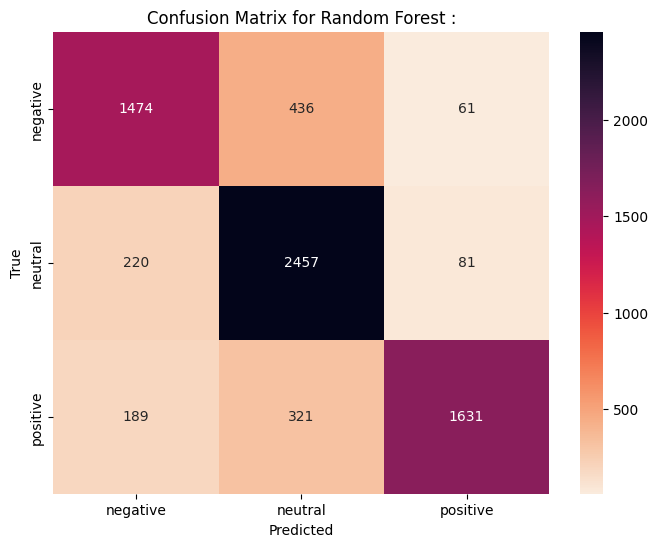

In [58]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rocket_r",
            xticklabels=rf_model.classes_,
            yticklabels=rf_model.classes_)
plt.title("Confusion Matrix for Random Forest :")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#_**SVM Model**_

In [59]:
from sklearn.svm import SVC

In [60]:
# Initialize SVM classifier with custom parameters
svm_model = SVC(kernel='linear', random_state=42)

# Train the SVM classifier
svm_model.fit(X_train_tfidf, Y_train)

# Predict sentiment labels for testing data
y_pred_svm = svm_model.predict(X_test_tfidf)

###_*Model Metrics*_

In [61]:
# Evaluate the model
accuracy_svm = accuracy_score(Y_test, y_pred_svm)
print("Accuracy for SVM :", accuracy_svm)

# Display classification report
print("Classification Report for SVM :")
print(classification_report(Y_test, y_pred_svm))

Accuracy for SVM : 0.8356622998544396
Classification Report for SVM :
              precision    recall  f1-score   support

    negative       0.82      0.79      0.80      1971
     neutral       0.79      0.88      0.84      2758
    positive       0.92      0.82      0.87      2141

    accuracy                           0.84      6870
   macro avg       0.84      0.83      0.84      6870
weighted avg       0.84      0.84      0.84      6870



###_*Model Confusion Matrix*_

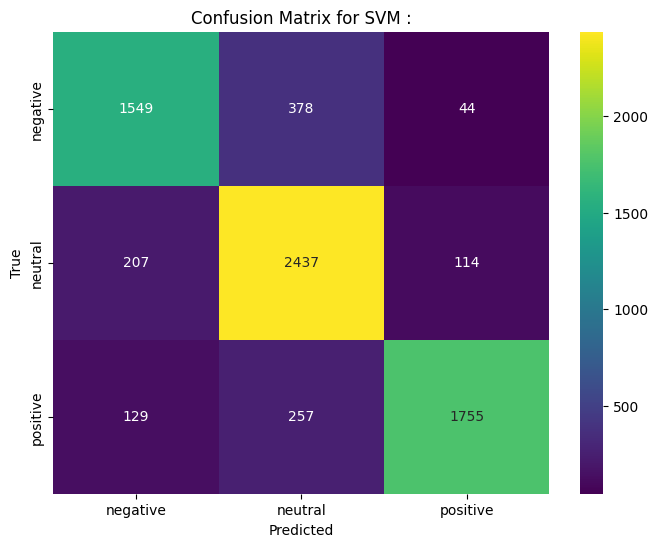

In [62]:
# Generate confusion matrix
conf_matrix = confusion_matrix(Y_test, y_pred_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="viridis",
            xticklabels=svm_model.classes_,
            yticklabels=svm_model.classes_)
plt.title("Confusion Matrix for SVM :")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#_**All models accuracies**_

In [63]:
print("Baseline model:",baseline_accuracy)
print("Logistic regression:",accuracy_lr)
print("Decision Tree Classification:",accuracy_dt)
print("Random Forest Classifier:",accuracy_rf)
print("SVM Classifier:",accuracy_svm)

Baseline model: 0.40454876273653567
Logistic regression: 0.8294032023289665
Decision Tree Classification: 0.7615720524017467
Random Forest Classifier: 0.8096069868995633
SVM Classifier: 0.8356622998544396


###_**Test SVM Model using an input text**_

In [ ]:
user = input("Enter a Text: ")
data_input = vectorization.transform([user]).toarray()
output = svm_model.predict(data_input)
print(output)

Enter a Text: work is hard
['negative']


In [ ]:
data_new = data.copy()

In [ ]:
data_new.shape

(27480, 14)

In [ ]:
data_new['clean_text']

0                        Id have responded if I were going
1               Sooo SAD I will miss you here in San Diego
2                                   my boss is bullying me
3                            what interview leave me alone
4        Sons of why couldnt they put them on the relea...
                               ...                        
27476    wish we could come see u on Denver husband los...
27477    Ive wondered about rake to The client has made...
27478    Yay good for both of you Enjoy the break you p...
27479                                  But it was worth it
27480    All this flirting going on The ATG smiles Yay ...
Name: clean_text, Length: 27480, dtype: object

#_**Prediction Sentiment Function :**_  predict sentiments for a given column

In [ ]:
def predict_sentiment_for_column(column_data, vectorizer, model):
    # Transform the column data using TF-IDF vectorizer
    column_tfidf = vectorizer.transform(column_data)

    # Predict sentiment for the column data using the model
    column_sentiment = model.predict(column_tfidf)

    return column_sentiment

In [ ]:
user_column = data_new['clean_text']

# Predict sentiment for the column using svm model
column_sentiment = predict_sentiment_for_column(user_column, vectorization, svm_model)

# Add the predicted sentiment as a new column in the dataframe named "predicted_sentiment"
data_new["predicted_sentiment"] = column_sentiment

print(data_new.head())

       textID                                               text  \
0  cb774db0d1                I`d have responded, if I were going   
1  549e992a42      Sooo SAD I will miss you here in San Diego!!!   
2  088c60f138                          my boss is bullying me...   
3  9642c003ef                     what interview! leave me alone   
4  358bd9e861   Sons of ****, why couldn`t they put them on t...   

                       selected_text sentiment Time of Tweet Age of User  \
0  Id have responded if I were going   neutral       morning        0-20   
1                           Sooo SAD  negative          noon       21-30   
2                        bullying me  negative         night       31-45   
3                     leave me alone  negative       morning       46-60   
4                           Sons of   negative          noon       60-70   

       Country  Population -2020  Land Area (Km²)  Density (P/Km²)  \
0  Afghanistan        38928346.0         652860.0             60

In [ ]:
data_selected = data_new[['clean_text', 'sentiment', 'predicted_sentiment']].copy()

In [ ]:
data_selected.shape

(27480, 3)

In [ ]:
data_selected.head()

,clean_text,sentiment,predicted_sentiment
0,Id have responded if I were going,neutral,neutral
1,Sooo SAD I will miss you here in San Diego,negative,negative
2,my boss is bullying me,negative,neutral
3,what interview leave me alone,negative,negative
4,Sons of why couldnt they put them on the relea...,negative,neutral


###_**The result above represent the result of applying predict_sentiment_for_column on the "clean_text" column**_

#**FAKE NEWS DETECTION**

---



In [68]:
#DATA IMPORTING

In [64]:
data_fake = pd.read_csv('/content/Fake.csv', encoding='latin1')
data_real = pd.read_csv('/content/True.csv', encoding='latin1')

In [65]:
print("Fake News Data Shape :",data_fake.shape)
print("-------------------------------------------------------------------------------------------")
print("Fake News Data Head :",data_fake.head())

Fake News Data Shape : (23481, 4)
-------------------------------------------------------------------------------------------
Fake News Data Head :                                                title  \
0   Donald Trump Sends Out Embarrassing New Yearâ...   
1   Drunk Bragging Trump Staffer Started Russian ...   
2   Sheriff David Clarke Becomes An Internet Joke...   
3   Trump Is So Obsessed He Even Has Obamaâs Na...   
4   Pope Francis Just Called Out Donald Trump Dur...   

                                                text subject  \
0  Donald Trump just couldn t wish all Americans ...    News   
1  House Intelligence Committee Chairman Devin Nu...    News   
2  On Friday, it was revealed that former Milwauk...    News   
3  On Christmas day, Donald Trump announced that ...    News   
4  Pope Francis used his annual Christmas Day mes...    News   

                date  
0  December 31, 2017  
1  December 31, 2017  
2  December 30, 2017  
3  December 29, 2017  
4  December 25,

In [ ]:
data_fake.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


In [ ]:
print("True News Data Shape :",data_real.shape)
print("-------------------------------------------------------------------------------------------")
print("True News Data Head :",data_real.head())

True News Data Shape : (21417, 4)
-------------------------------------------------------------------------------------------
True News Data Head :                                                title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text       subject  \
0  WASHINGTON (Reuters) - The head of a conservat...  politicsNews   
1  WASHINGTON (Reuters) - Transgender people will...  politicsNews   
2  WASHINGTON (Reuters) - The special counsel inv...  politicsNews   
3  WASHINGTON (Reuters) - Trump campaign adviser ...  politicsNews   
4  SEATTLE/WASHINGTON (Reuters) - President Donal...  politicsNews   

                 date  
0  December 31, 2017   
1  December 29, 2017   
2  December 31, 2017  

In [ ]:
data_real = data_real[['title', 'text']]
data_fake = data_fake[['title', 'text']]

In [ ]:
print("Fake News Data Shape :",data_fake.shape)
print("---------------------------------------------------")
print("True News Data Shape :",data_real.shape)

Fake News Data Shape : (23481, 2)
---------------------------------------------------
True News Data Shape : (21417, 2)


In [ ]:
data_real['class'] = 1
data_fake['class'] = 0

In [ ]:
print("Fake News Data Shape :",data_fake.shape)
print("---------------------------------------------------")
print("True News Data Shape :",data_real.shape)

Fake News Data Shape : (23481, 3)
---------------------------------------------------
True News Data Shape : (21417, 3)


In [ ]:
data_News = pd.concat([data_real, data_fake], ignore_index=True, sort=False)

In [ ]:
print("News Data Shape :",data_News.shape)
print("\n-------------------------------------------------------------------------------------------\n")
print("News Data Head :\n",data_News.head())
print("\n-------------------------------------------------------------------------------------------\n")
print("News Data Tail :\n",data_News.tail())

News Data Shape : (44898, 3)

-------------------------------------------------------------------------------------------

News Data Head :
                                                title  \
0  As U.S. budget fight looms, Republicans flip t...   
1  U.S. military to accept transgender recruits o...   
2  Senior U.S. Republican senator: 'Let Mr. Muell...   
3  FBI Russia probe helped by Australian diplomat...   
4  Trump wants Postal Service to charge 'much mor...   

                                                text  class  
0  WASHINGTON (Reuters) - The head of a conservat...      1  
1  WASHINGTON (Reuters) - Transgender people will...      1  
2  WASHINGTON (Reuters) - The special counsel inv...      1  
3  WASHINGTON (Reuters) - Trump campaign adviser ...      1  
4  SEATTLE/WASHINGTON (Reuters) - President Donal...      1  

-------------------------------------------------------------------------------------------

News Data Tail :
                                       

In [ ]:
#data_News.to_csv('Data_News_ft.csv', index=False)

#_**NEWS DISTRIBUTION**_

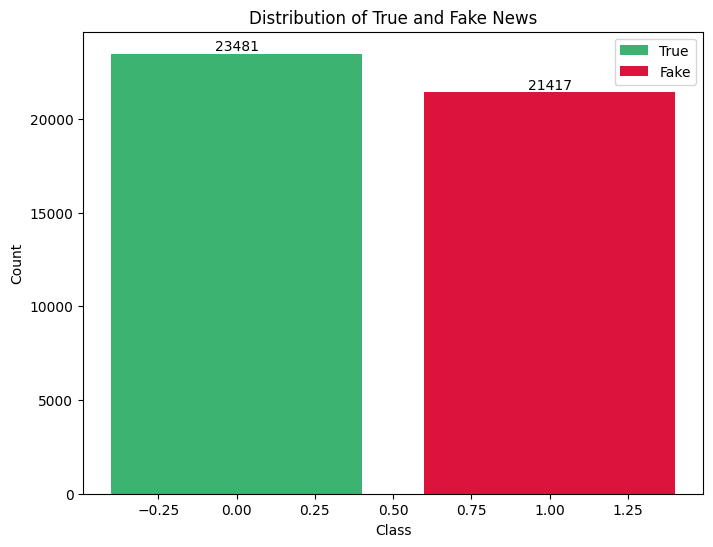

In [ ]:
class_counts = data_News['class'].value_counts()
colors = ['mediumseagreen', 'crimson']

plt.figure(figsize=(8, 6))
bars = plt.bar(class_counts.index, class_counts.values, color=colors)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 1), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Distribution of True and Fake News')
plt.legend(bars, ['True', 'Fake'])
plt.show()

#_**DATA PREPROCESSING**_

####_*Concat title and text columns at the same new column*_

In [ ]:
data_News['title_text'] = data_News['title'] + ' ' + df['text']

####_*Drop the title and text columns*_

In [ ]:
data_News.drop(['title', 'text'], axis=1, inplace=True)

In [ ]:
data_News.shape

(44898, 2)

####_*Drop Nan values*_

In [ ]:
data_News['title_text'].dropna(inplace=True)

In [ ]:
data_News.shape

(44898, 2)

In [ ]:
data_News['title_text'].head(15)

0     As U.S. budget fight looms, Republicans flip t...
1     U.S. military to accept transgender recruits o...
2     Senior U.S. Republican senator: 'Let Mr. Muell...
3     FBI Russia probe helped by Australian diplomat...
4     Trump wants Postal Service to charge 'much mor...
5     White House, Congress prepare for talks on spe...
6     Trump says Russia probe will be fair, but time...
7     Factbox: Trump on Twitter (Dec 29) - Approval ...
8     Trump on Twitter (Dec 28) - Global Warming  Bo...
9     Alabama official to certify Senator-elect Jone...
10    Jones certified U.S. Senate winner despite Moo...
11    New York governor questions the constitutional...
12    Factbox: Trump on Twitter (Dec 28) - Vanity Fa...
13    Trump on Twitter (Dec 27) - Trump, Iraq, Syria...
14    Man says he delivered manure to Mnuchin to pro...
Name: title_text, dtype: object

####_*Remove Stopwords*_

In [ ]:
data_News['title_text'] = data_News['title_text'].apply(remove_stopwords)

In [ ]:
data_News['title_text'].head(15)

0     U.S. budget fight looms, Republicans flip fisc...
1     U.S. military accept transgender recruits Mond...
2     Senior U.S. Republican senator: 'Let Mr. Muell...
3     FBI Russia probe helped Australian diplomat ti...
4     Trump wants Postal Service charge 'much more' ...
5     White House, Congress prepare talks spending, ...
6     Trump says Russia probe fair, timeline unclear...
7     Factbox: Trump Twitter (Dec 29) - Approval rat...
8               Trump Twitter (Dec 28) - Global Warming
9     Alabama official certify Senator-elect Jones t...
10    Jones certified U.S. Senate winner despite Moo...
11    New York governor questions constitutionality ...
12    Factbox: Trump Twitter (Dec 28) - Vanity Fair,...
13    Trump Twitter (Dec 27) - Trump, Iraq, Syria wa...
14    Man says delivered manure Mnuchin protest new ...
Name: title_text, dtype: object

####_*Remove_characters*_

In [ ]:
data_News['title_text'] = data_News['title_text'].apply(remove_characters)

In [ ]:
data_News['title_text'].head(15)

0     US budget fight looms Republicans flip fiscal ...
1     US military accept transgender recruits Monday...
2     Senior US Republican senator Let Mr Mueller jo...
3     FBI Russia probe helped Australian diplomat ti...
4     Trump wants Postal Service charge much more Am...
5     White House Congress prepare talks spending im...
6     Trump says Russia probe fair timeline unclear ...
7     Factbox Trump Twitter Dec 29 Approval rating A...
8                   Trump Twitter Dec 28 Global Warming
9     Alabama official certify Senatorelect Jones to...
10    Jones certified US Senate winner despite Moore...
11    New York governor questions constitutionality ...
12    Factbox Trump Twitter Dec 28 Vanity Fair Hilla...
13    Trump Twitter Dec 27 Trump Iraq Syria want go ...
14    Man says delivered manure Mnuchin protest new ...
Name: title_text, dtype: object

In [ ]:
data_News['title_text'] = data_News['title_text'].apply(stpwrd)

In [ ]:
data_News['title_text'].head(15)

0     US budget fight looms Republicans flip fiscal ...
1     US military accept transgender recruits Monday...
2     Senior US Republican senator Let Mr Mueller jo...
3     FBI Russia probe helped Australian diplomat ti...
4     Trump wants Postal Service charge much more Am...
5     White House Congress prepare talks spending im...
6     Trump says Russia probe fair timeline unclear ...
7     Factbox Trump Twitter Dec  Approval rating Ama...
8                     Trump Twitter Dec  Global Warming
9     Alabama official certify Senatorelect Jones to...
10    Jones certified US Senate winner despite Moore...
11    New York governor questions constitutionality ...
12    Factbox Trump Twitter Dec  Vanity Fair Hillary...
13    Trump Twitter Dec  Trump Iraq Syria want go mu...
14    Man says delivered manure Mnuchin protest new ...
Name: title_text, dtype: object

In [ ]:
data_News['title_text'].shape

(44898,)

#_**DEFINING DATA AND TARGET FOR THE MODEL**_

In [ ]:
x = data_News['title_text']
y = data_News['class']

#_**SPLITING DATA**_

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [ ]:
# Initialize TF-IDF vectorizer
vectorization_ = TfidfVectorizer()
# Fit and transform the training data
x_train_tfidf = vectorization_.fit_transform(x_train)
# Transform the testing data
x_test_tfidf = vectorization_.transform(x_test)

#_**XGBOOST Model**_

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# Initialize XGBoost classifier with custom parameters
xgb_model=XGBClassifier()

# Train the XGBoost classifier
xgb_model.fit(x_train_tfidf,y_train)

# Predict sentiment labels for testing data
y_pred_xgb=xgb_model.predict(x_test_tfidf)

###_*Model Metrics*_

In [ ]:
# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print("Accuracy of XGBoost:", accuracy_xgb)

# Display classification report
print("Classification Report of XGBoost:")
print(classification_report(y_test, y_pred_xgb))

Accuracy of XGBoost: 0.8996881959910913
Classification Report of XGBoost:
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      5872
           1       0.92      0.86      0.89      5353

    accuracy                           0.90     11225
   macro avg       0.90      0.90      0.90     11225
weighted avg       0.90      0.90      0.90     11225



###_*Model Confusion Matrix*_

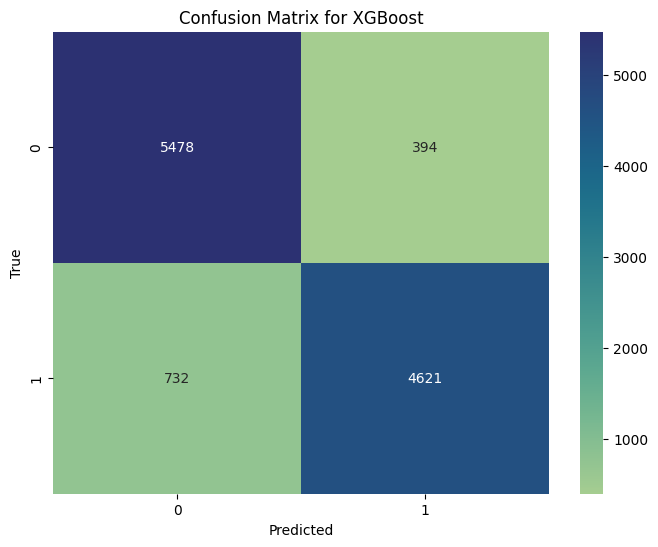

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_xgb)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="crest",
            xticklabels=xgb_model.classes_,
            yticklabels=xgb_model.classes_)
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#_**LOGISTIC REGRESSION Model**_

In [ ]:
# Initialize Logistic Regression model with custom parameters
lr_nd_model = LogisticRegression(max_iter=1000, penalty='l2', C=1.0, solver='liblinear',
                              class_weight='balanced', random_state=42)

# Train the Logistic Regression model
lr_nd_model.fit(x_train_tfidf, y_train)

# Predict sentiment labels for testing data
y_pred_lr_nd = lr_nd_model.predict(x_test_tfidf)

###_*Model Metrics*_

In [ ]:
# Evaluate the model
accuracy_lr_nd = accuracy_score(y_test, y_pred_lr_nd)
print("Accuracy of Logistic Regression:", accuracy_lr_nd)

# Display classification report
print("Classification Report of Logistic Regression::")
print(classification_report(y_test, y_pred_lr_nd))

Accuracy of Logistic Regression: 0.9407572383073497
Classification Report of Logistic Regression::
              precision    recall  f1-score   support

           0       0.95      0.93      0.94      5872
           1       0.93      0.95      0.94      5353

    accuracy                           0.94     11225
   macro avg       0.94      0.94      0.94     11225
weighted avg       0.94      0.94      0.94     11225



###_*Model Confusion Matrix*_

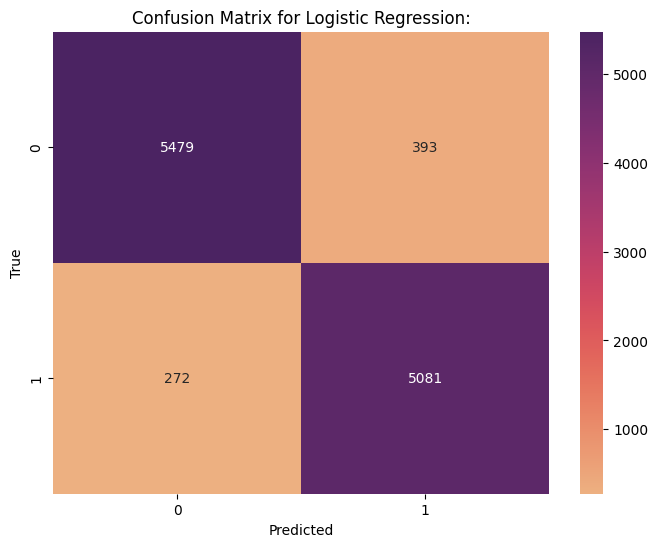

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_lr_nd)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="flare",
            xticklabels=xgb_model.classes_,
            yticklabels=xgb_model.classes_)
plt.title("Confusion Matrix for Logistic Regression:")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

#_**Models accuracies**_

In [ ]:
print("XGBoost Classifier:",accuracy_xgb)
print("Logistic regression:",accuracy_lr_nd)

XGBoost Classifier: 0.8996881959910913
Logistic regression: 0.9407572383073497


#_**Prediction Sentiment Function :**_  predict sentiments for a given column

In [ ]:
def predict_sentiment(text, model, vectorizer):
  text_vector = vectorizer.transform([text])
  predicted_sentiment = model.predict(text_vector)[0]
  return predicted_sentiment

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

TfidfVectorizer()

In [ ]:
predicted_sentiments = []

for title in data_News['title_text']:
  try:
    predicted_sentiment = predict_sentiment(title, svm_model, vectorizer)
    predicted_sentiments.append(predicted_sentiment)
  except Exception as e:
    print(f"Error predicting sentiment for title: {title}. Error: {e}")

# Add the predicted sentiments as a new column named "Predicted_Sentiment"
data_News["Predicted_Sentiment"] = predicted_sentiments
print(data_News.head())

   class                                         title_text  \
0      1  US budget fight looms Republicans flip fiscal ...   
1      1  US military accept transgender recruits Monday...   
2      1  Senior US Republican senator Let Mr Mueller jo...   
3      1  FBI Russia probe helped Australian diplomat ti...   
4      1  Trump wants Postal Service charge much Amazon ...   

  Predicted_Sentiment  
0            negative  
1            negative  
2             neutral  
3            negative  
4            negative  


In [ ]:
#data_News.to_csv('Data_News_Sentiment.csv', index=False)

###_**The result above represent the result of applying predict_sentiment_for_column on the "title_text" column. The result are stored in CSV file  named "Data_News_Sentiments**_

## **DONE.**